### The term "LAS format" typically refers to the Log ASCII Standard format, which is a common file format used in the oil and gas industry to store well log data. Well logs are records of geological and geophysical data collected during drilling and other subsurface activities. 


## Importing Welly and other libraries library :

In [37]:
import welly 

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings('ignore')

## Loading data from LAS file:
   #### welly.Well.from_las() is used to load data from las files

In [39]:
# Loading data from las file:
well = welly.Well.from_las('15-9-19_SR_COMP.LAS')

In [40]:
type(well)

welly.well.Well

In [41]:
well

Well(uwi: '', name: '15/9-19', 7 curves: ['AC', 'CALI', 'DEN', 'GR', 'NEU', 'RDEP', 'RMED'])

## header provides the basic well information from the WELL part of the file:
##### company name, field name, well name etc

In [44]:
well.header

,original_mnemonic,mnemonic,unit,value,descr,section
0,VERS,VERS,,2.0,CWLS Log ASCII Standard-VERSION 2.0,Version
1,WRAP,WRAP,,NO,One line per depth step,Version
2,STRT,STRT,M,102.1568,Top Depth,Well
3,STOP,STOP,M,4636.514,Bottom Depth,Well
4,STEP,STEP,M,0.1524,Depth Increment,Well
5,NULL,NULL,,-999.25,Null Value,Well
6,FLD,FLD,,Q15,Field Name,Well
7,WELL,WELL,,15/9-19,NAME,Well
8,WBN,WBN,,15/9-19 SR,WELLBORE,Well
9,NATI,NATI,,NOR,COUNTRY,Well


In [45]:
# Well logs data in form of dictionaries
well.data

{'AC': Curve(mnemonic=AC, units=US/F, start=102.1568, stop=4636.5140, step=0.1524, count=[7007]),
 'CALI': Curve(mnemonic=CALI, units=IN, start=102.1568, stop=4636.5140, step=0.1524, count=[7007]),
 'DEN': Curve(mnemonic=DEN, units=G/CC, start=102.1568, stop=4636.5140, step=0.1524, count=[7084]),
 'GR': Curve(mnemonic=GR, units=GAPI, start=102.1568, stop=4636.5140, step=0.1524, count=[28117]),
 'NEU': Curve(mnemonic=NEU, units=%, start=102.1568, stop=4636.5140, step=0.1524, count=[7096]),
 'RDEP': Curve(mnemonic=RDEP, units=OHMM, start=102.1568, stop=4636.5140, step=0.1524, count=[12223]),
 'RMED': Curve(mnemonic=RMED, units=OHMM, start=102.1568, stop=4636.5140, step=0.1524, count=[12223])}

In [46]:
#Basic information about one log
well.data['AC']

Curve(mnemonic=AC, units=US/F, start=102.1568, stop=4636.5140, step=0.1524, count=[7007])

In [47]:
gr = well.data['GR']
gr

Curve(mnemonic=GR, units=GAPI, start=102.1568, stop=4636.5140, step=0.1524, count=[28117])

<AxesSubplot:title={'center':'GR'}, xlabel='GAPI'>

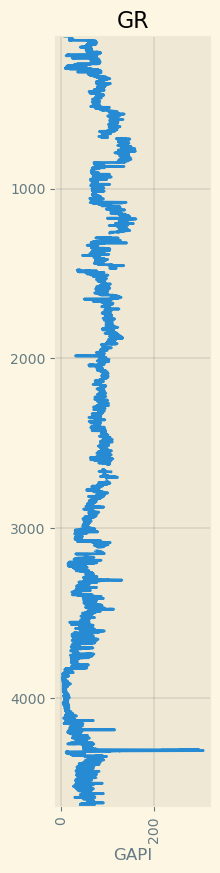

In [52]:
#Plotting a single log data
well.data['GR'].plot()

In [48]:
#Reading value of log at certain depth
gr.read_at(3500)

60.34592834645687

In [49]:
gr.read_at([1001, 1003, 1004])

[67.84736062992008, 75.6229598425197, 76.7966031496064]

In [50]:
#Basic stats of one curve
gr.describe()

,GR
count,28117.0000000000
mean,71.9867977096
std,32.9227797788
min,2.7661000000
25%,50.2552000000
50%,74.9985000000
75%,92.3438000000
max,304.3337000000


In [51]:
#Starting and stopping depth
gr.start,gr.stop

(102.1568, 4636.514)

In [13]:
df=well.df()

In [14]:
df.head()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN
102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN
102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN
102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN
102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN


<AxesSubplot:ylabel='DEPT'>

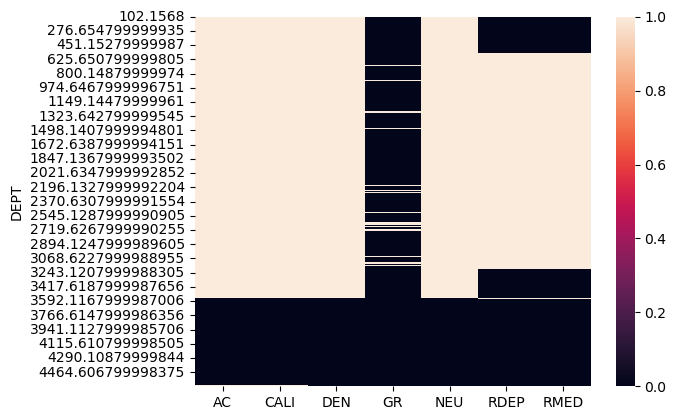

In [16]:
sns.heatmap(df.isna())

In [17]:
## Gamma ray is run from 102.1568 ft to 4464.606 ft, other logs are running in certain section

In [18]:
well.count_curves()

7

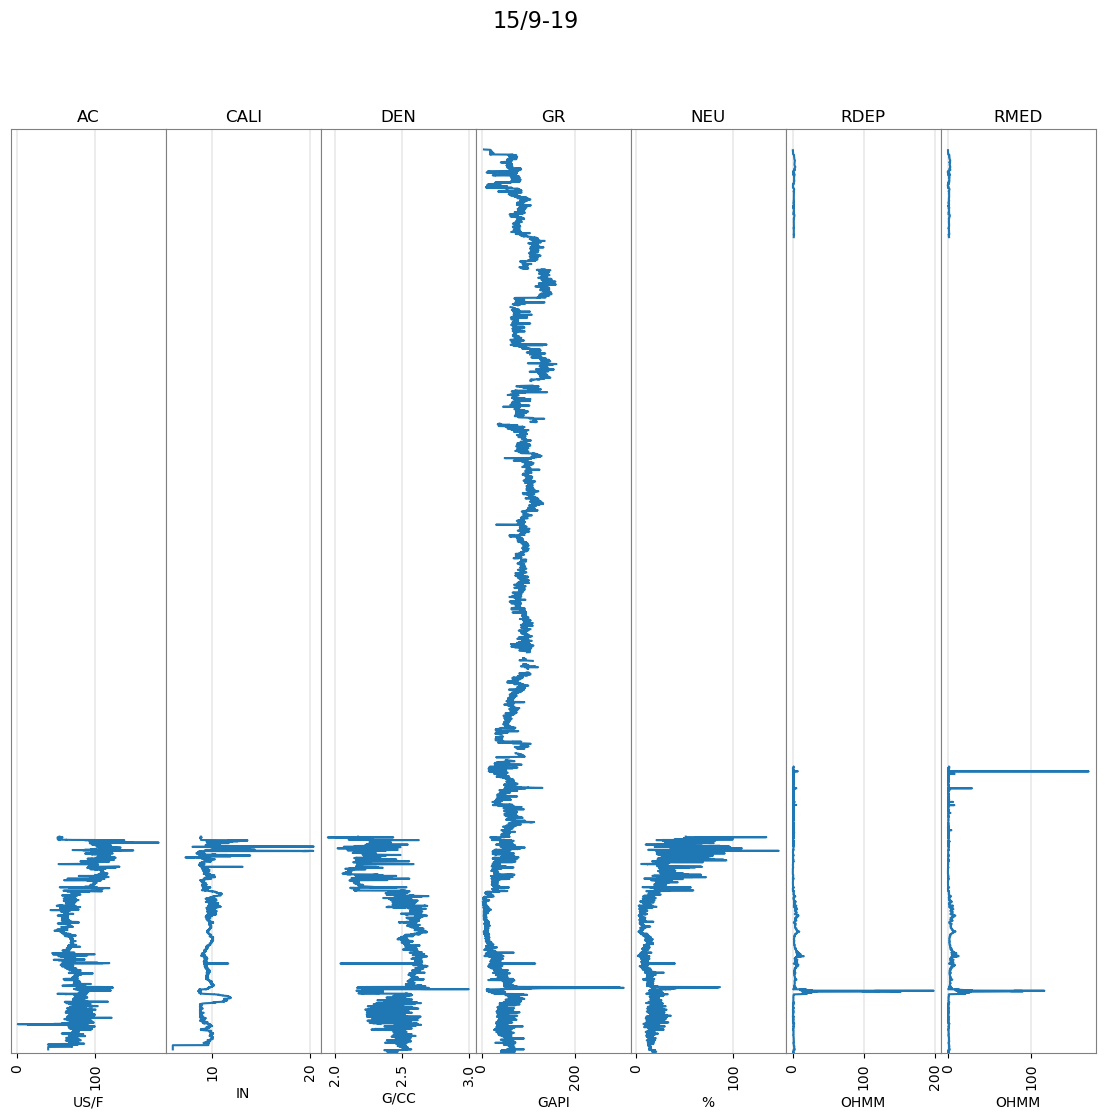

In [20]:
well.plot()

In [23]:
# Lets take GR and Caliper log

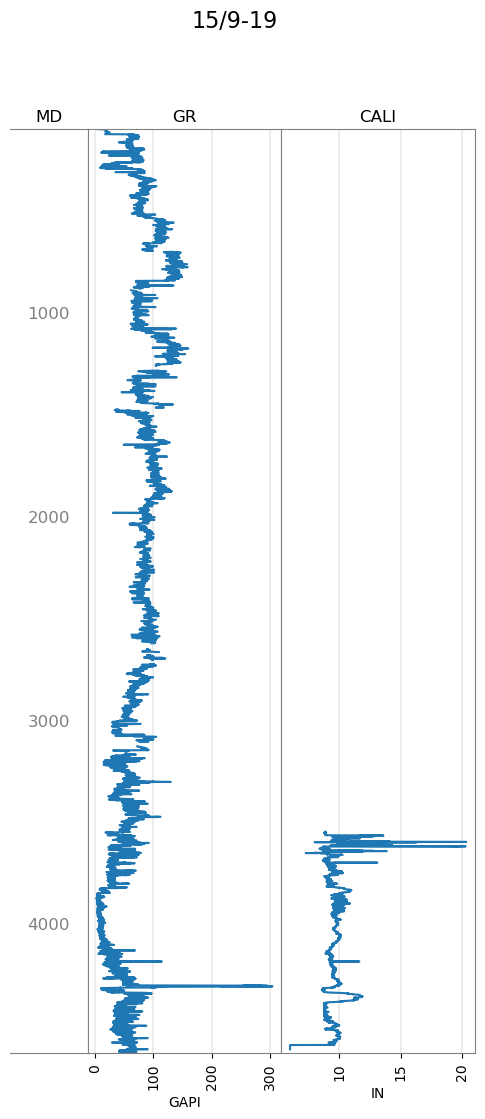

In [22]:
trackers=['MD','GR','CALI']
well.plot(tracks=trackers)

In [24]:
## Let us club together deep resistivity and medium reasistivity


In [26]:
tracks=['MD','GR','CALI',['RDEP',"RMED"]]

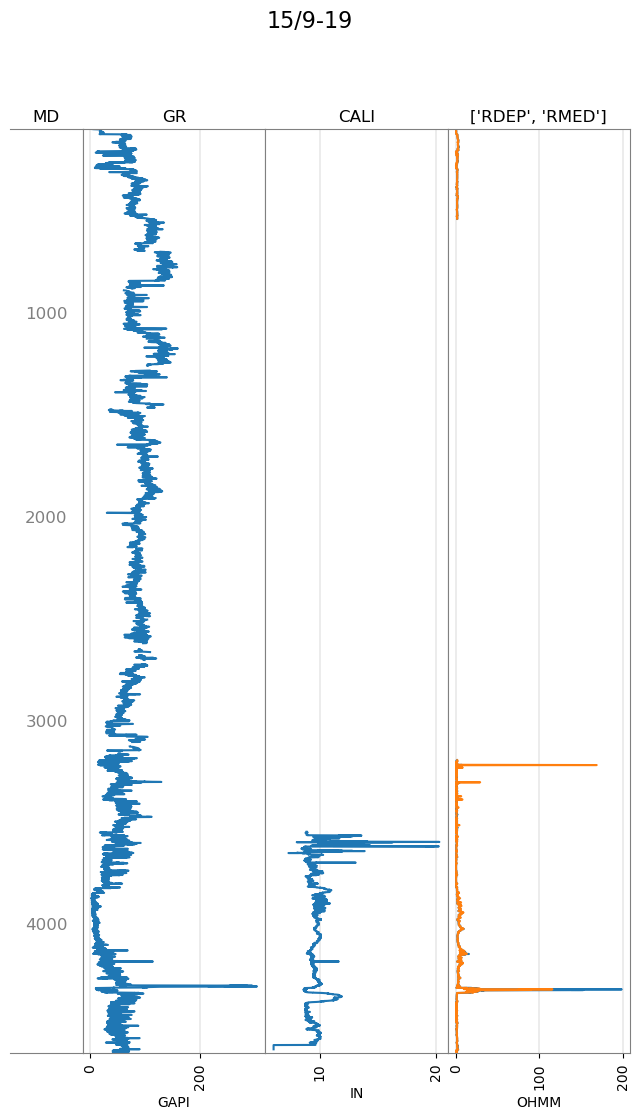

In [27]:
well.plot(tracks=tracks)

In [28]:
# Lets visualize data fro the depth where all the logs are present

In [29]:
well.unify_basis(start=3550,stop=4600)

In [30]:
wello=well

In [31]:
tracks=['MD','GR','CALI','DEN',['AC','NEU'],'RDEP','RMED']

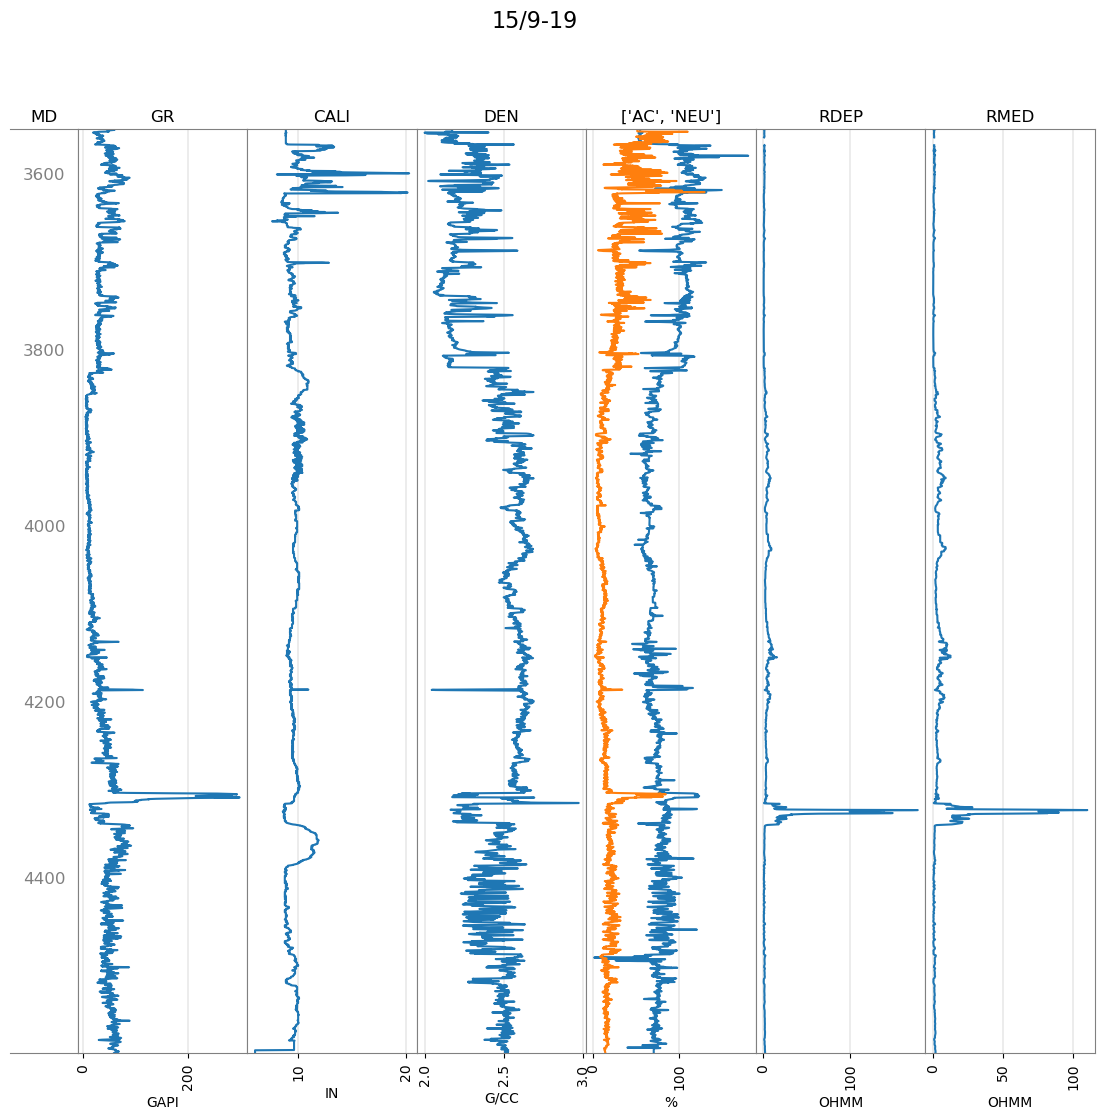

In [32]:
well.plot(tracks=tracks)

In [33]:
## To change the style of the plot

In [34]:
plt.style.use('Solarize_Light2')

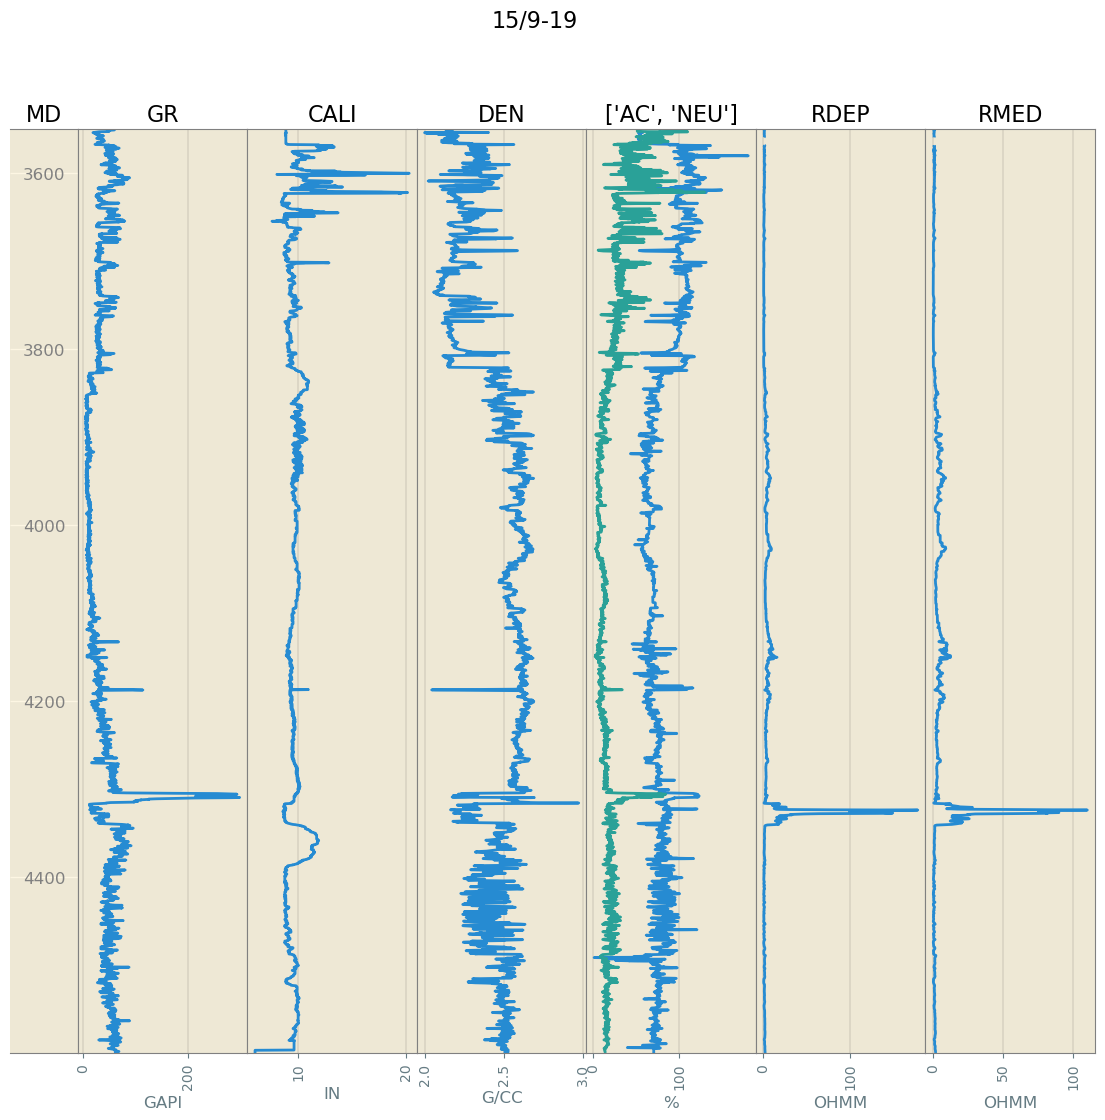

In [35]:
well.plot(tracks=tracks)

## If a particular log is very costly , for example NMR log. In this case we cant run this log again and again , so we can collect data from the past and create machine learning project to predict the outcome which will be cost effective for the company. 